In [6]:
import nltk, pandas as pd, string
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dorian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# --- reading dataset --- #
df = pd.read_csv('G:/Extractive-Summarisation-of-German-Wikipedia/dataset/data_train.csv', encoding='utf-8')

In [4]:
# -- counting the number of sentences of summaries and original texts -- #
def sentence_count(row):
    tokens = sent_tokenize(row, language='german')
    return len(tokens)

df['no_sent_source'] = df['source'].apply(sentence_count)
df['no_sent_summary'] = df['summary'].apply(sentence_count)
df.head()

,source,summary,no_sent_source,no_sent_summary
0,Minghella war der Sohn italienisch-schottische...,"Anthony Minghella, CBE war ein britischer Film...",23,1
1,Ende der 1940er Jahre wurde eine erste Auteur-...,Die Auteur-Theorie ist eine Filmtheorie und di...,69,3
2,"Al Pacino, geboren in Manhattan, ist der Sohn ...","Alfredo James ""Al"" Pacino ist ein US-amerikani...",43,4
3,Der Name der Alkalimetalle leitet sich von dem...,Als Alkalimetalle werden die chemischen Elemen...,36,4
4,Die Arbeit ist bereits seit dem Altertum Gegen...,Das deutsche Arbeitsrecht ist ein Rechtsgebiet...,51,1


In [53]:
# -- counting the number of sentences of summaries and original texts -- #
def word_count(row):
    row = row.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(row, language='german')
    return len(tokens)

df['no_word_source'] = df['source'].apply(word_count)
df['no_word_summary'] = df['summary'].apply(word_count)
df.head()

,source,summary,no_sent_source,no_sent_summary,no_word_source,no_word_summary,avg_source_w_len,avg_summary_w_len,avg_source_s_len,avg_summary_s_len
0,Minghella war der Sohn italienisch-schottische...,"Anthony Minghella, CBE war ein britischer Film...",23,1,444,14,5.194553,6.285714,133.347826,145.000000
1,Ende der 1940er Jahre wurde eine erste Auteur-...,Die Auteur-Theorie ist eine Filmtheorie und di...,69,3,1420,56,5.306442,5.692308,146.130435,139.666667
2,"Al Pacino, geboren in Manhattan, ist der Sohn ...","Alfredo James ""Al"" Pacino ist ein US-amerikani...",43,4,852,63,4.879377,5.712329,133.441860,118.500000
3,Der Name der Alkalimetalle leitet sich von dem...,Als Alkalimetalle werden die chemischen Elemen...,36,4,544,75,6.189573,5.747126,122.611111,142.750000
4,Die Arbeit ist bereits seit dem Altertum Gegen...,Das deutsche Arbeitsrecht ist ein Rechtsgebiet...,51,1,888,26,6.712991,7.035714,147.019608,222.000000


In [59]:
# --- avg word length -- #
def avg_w_len(row):
    row = row.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(row, language='german')
    return float(sum(len(w) for w in tokens)/len(tokens))

df['avg_source_w_len'] = df['source'].apply(avg_w_len)
df['avg_summary_w_len'] = df['summary'].apply(avg_w_len)
df.head()

,source,summary,no_sent_source,no_sent_summary,no_word_source,no_word_summary,avg_source_w_len,avg_summary_w_len,avg_source_s_len,avg_summary_s_len
0,Minghella war der Sohn italienisch-schottische...,"Anthony Minghella, CBE war ein britischer Film...",23,1,444,14,5.777027,8.714286,133.347826,145.000000
1,Ende der 1940er Jahre wurde eine erste Auteur-...,Die Auteur-Theorie ist eine Filmtheorie und di...,69,3,1420,56,5.961268,6.321429,146.130435,139.666667
2,"Al Pacino, geboren in Manhattan, ist der Sohn ...","Alfredo James ""Al"" Pacino ist ein US-amerikani...",43,4,852,63,5.564554,6.365079,133.441860,118.500000
3,Der Name der Alkalimetalle leitet sich von dem...,Als Alkalimetalle werden die chemischen Elemen...,36,4,544,75,6.981618,6.506667,122.611111,142.750000
4,Die Arbeit ist bereits seit dem Altertum Gegen...,Das deutsche Arbeitsrecht ist ein Rechtsgebiet...,51,1,888,26,7.346847,7.500000,147.019608,222.000000


In [57]:
# -- average sentance length in characters -- #
def avg_s_len(row):
    tokens = sent_tokenize(row, language='german')
    return float(sum(len(s) for s in tokens)/len(tokens))

df['avg_source_s_len'] = df['source'].apply(avg_s_len)
df['avg_summary_s_len'] = df['summary'].apply(avg_s_len)

avg_s_len_source = float(sum(idx for idx in df['avg_source_s_len'])/len(df))
avg_s_len_summary = float(sum(idx for idx in df['avg_summary_s_len'])/len(df))


print(avg_s_len_source, avg_s_len_summary)
df.head()

126.19653690882299 114.67222942718325


,source,summary,no_sent_source,no_sent_summary,no_word_source,no_word_summary,avg_source_w_len,avg_summary_w_len,avg_source_s_len,avg_summary_s_len
0,Minghella war der Sohn italienisch-schottische...,"Anthony Minghella, CBE war ein britischer Film...",23,1,444,14,5.777027,8.714286,133.347826,145.000000
1,Ende der 1940er Jahre wurde eine erste Auteur-...,Die Auteur-Theorie ist eine Filmtheorie und di...,69,3,1420,56,5.961268,6.321429,146.130435,139.666667
2,"Al Pacino, geboren in Manhattan, ist der Sohn ...","Alfredo James ""Al"" Pacino ist ein US-amerikani...",43,4,852,63,5.564554,6.365079,133.441860,118.500000
3,Der Name der Alkalimetalle leitet sich von dem...,Als Alkalimetalle werden die chemischen Elemen...,36,4,544,75,6.981618,6.506667,122.611111,142.750000
4,Die Arbeit ist bereits seit dem Altertum Gegen...,Das deutsche Arbeitsrecht ist ein Rechtsgebiet...,51,1,888,26,7.346847,7.500000,147.019608,222.000000


In [56]:
avg_w_no_source = float(sum(df['no_word_source'])/len(df['no_word_source']))
avg_w_no_summary = float(sum(df['no_word_summary'])/len(df['no_word_summary']))
print(avg_w_no_source, avg_w_no_summary)

559.93383 32.85926


In [17]:
avg_s_no_source = float(sum(df['no_sent_source'])/len(df['no_sent_source']))
avg_s_no_summary = float(sum(df['no_sent_summary'])/len(df['no_sent_summary']))
print(avg_s_no_source, avg_s_no_summary)

32.0396 2.22468


In [60]:
avg_w_len_source = float(sum(idx for idx in df['avg_source_w_len'])/len(df))
avg_w_len_summary = float(sum(idx for idx in df['avg_summary_w_len'])/len(df))
print(avg_w_len_source, avg_w_len_summary)

6.037844064022607 6.38804764156304


In [24]:
# --- number of sentances of the longest text --- #
df[df['no_word_source']==df['no_word_source'].max()]

,source,summary,no_sent_source,no_sent_summary,no_word_source,no_word_summary,avg_source_w_len,avg_summary_w_len,avg_source_s_len,avg_summary_s_len
29544,"Jasper Newton ""Jack"" Daniel wurde um 1846 in e...",Jack Daniel’s ist der Markenname eines Tenness...,84,3,2000,62,5.2675,5.629032,144.107143,133.333333


In [26]:
# --- number of sentances of the longest text --- #
df[df['no_word_summary']==df['no_word_summary'].max()]

,source,summary,no_sent_source,no_sent_summary,no_word_source,no_word_summary,avg_source_w_len,avg_summary_w_len,avg_source_s_len,avg_summary_s_len
24920,"Der Name ""The Revolution"" tauchte zum ersten M...","The Revolution, früher als Prince and the Rev...",79,6,1803,150,4.742097,4.593333,125.075949,132.0


In [ ]:
df['source'][0]

In [50]:
import string
sent = "Minghella war der Sohn italienisch-schottischer Eltern, die auf der Isle of Wight eine Fabrik für Eiscreme betrieben. Nach seinem Schulabschluss studierte er an der Universität Hull, wo er eine Zeit lang als Dozent tätig war. 1978 drehte er einen ersten Kurzfilm."
sent= sent.translate(str.maketrans(' ',' ',string.punctuation))
#tokens = sent_tokenize(sent, language='german')
#print (len(tokens))

tok = word_tokenize(sent, language='german')
print(tok)
print (len(tok))

['Minghella', 'war', 'der', 'Sohn', 'italienischschottischer', 'Eltern', 'die', 'auf', 'der', 'Isle', 'of', 'Wight', 'eine', 'Fabrik', 'für', 'Eiscreme', 'betrieben', 'Nach', 'seinem', 'Schulabschluss', 'studierte', 'er', 'an', 'der', 'Universität', 'Hull', 'wo', 'er', 'eine', 'Zeit', 'lang', 'als', 'Dozent', 'tätig', 'war', '1978', 'drehte', 'er', 'einen', 'ersten', 'Kurzfilm']
41


In [68]:
df[df['no_word_summary'] == df['no_word_summary'].min()]

,source,summary,no_sent_source,no_sent_summary,no_word_source,no_word_summary,avg_source_w_len,avg_summary_w_len,avg_source_s_len,avg_summary_s_len
2214,Thomas Chippendale wurde als Sohn des Tischler...,Thomas Chippendale war ein Kunsttischler .,68,1,1177,5,6.116398,7.2,124.617647,42.0
7731,Hans Müllejans studierte ab 1949 in München ...,Johannes Müllejans war Aachener Dompropst.,26,1,353,5,5.949008,7.6,95.576923,43.0
16745,Hark Olufs wurde am 17. oder 19. Juli 1708 in ...,Hark Olufs war ein Seefahrer.,43,1,651,5,5.039939,4.8,93.162791,29.0
17788,Sulochana ist anglo-indischer Herkunft. Mitte ...,Sulochana war eine indische Filmschauspielerin.,16,1,256,5,5.992188,8.4,114.062500,47.0
22494,"Tatjana Barbakoff wurde als Tsipora Edelberg, ...",Tatjana Barbakoff war eine Tänzerin.,20,1,407,5,5.690418,6.4,138.100000,37.0
22548,Ihr Geburtsort Balfour Downs Station liegt im ...,Doris Pilkington war eine Aborigine-Schriftste...,14,1,247,5,5.939271,9.4,125.000000,53.0
22895,Jaromír entstammte dem böhmischen Geschlecht...,Jaromír-Gebehard war Bischof von Prag.,30,1,423,5,5.843972,6.6,97.733333,39.0
31024,Sein Geburtsdatum und seine Herkunft sind nich...,Pilgrim war Bischof von Prag.,22,1,291,5,5.604811,4.8,88.227273,29.0
32503,Adolph Schlicht hatte den Beruf eines Kaufmann...,Adolph Schlicht war ein Kommunalpolitiker .,22,1,388,5,6.453608,7.4,133.045455,43.0
59063,Wilhelm Hellwag wurde als Sohn von Ernst Ludwi...,Wilhelm Hellwag war ein Eisenbahningenieur.,37,1,592,5,5.820946,7.6,110.432432,43.0


In [84]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

AttributeError: 'Figure' object has no attribute 'plot'

<Figure size 2000x700 with 0 Axes>

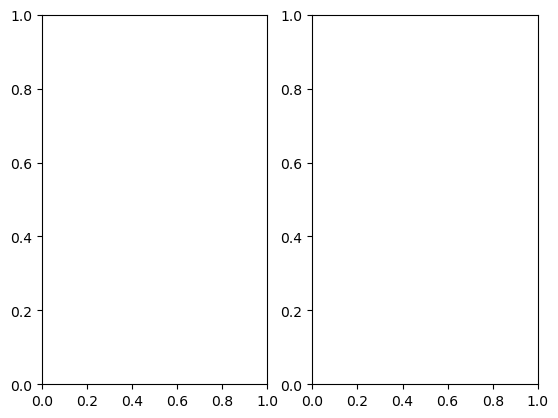

In [92]:
fig = plt.figure(figsize = (20, 7))
plt.subplots_adjust(wspace=.5)
fig.suptitle('Odnos duljine riječi rečenica')
(ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x='no_sent_source',y='no_word_source', kind = 'scatter')
plt.xlabel('broj riječi')
plt.ylabel('broj rečenica')

ax2.plot(x = df['no_sent_summary'], y = df['no_word_summary'], kind = 'scatter')
plt.xlabel('Broj riječi')
plt.ylabel('broj rečenica')

plt.show()

In [ ]:
#za klasifikatore potrebno definirati klasu yes no i onda na temelju user thresholda klasificarit za ekstrakciju ili ne
